In [2]:
import pandas as pd
import sys
sys.path.append("C:\\Users\\Manoj H A\\OneDrive\\Desktop\\crime\\")
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

import util_script as us

In [3]:
DATA_PATH = "C:\\Users\\Manoj H A\\OneDrive\\Desktop\\crime\\data\\"

file_names = ['crimes_2015.csv','crimes_2016.csv','crimes_2017.csv','crimes_2018.csv','crimes_2019.csv','crimes_2020.csv','crimes_2021.csv']
file_names = [DATA_PATH+x for x in file_names]

main_df = us.create_df(file_names)
orig_shape = main_df.shape
print("The Number of Crimes: "+ str(main_df.shape[0]))
print("\nThe Columns: "+ str(main_df.shape[1]))

Finished Loading Chicago Crime Dataset File for the year 2015.
Finished loading Chicago Crime Dataset file for the year 2016.
Finished loading Chicago Crime Dataset file for the year 2017.
Finished loading Chicago Crime Dataset file for the year 2018.
Finished loading Chicago Crime Dataset file for the year 2019.
Finished loading Chicago Crime Dataset file for the year 2020.
Finished loading Chicago Crime Dataset file for the year 2021.
All data files loaded onto the Main Dataframe.


The Number of Crimes: 1564310

The Columns: 22


In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564310 entries, 0 to 1564309
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1564310 non-null  int64  
 1   Case Number           1564310 non-null  object 
 2   Date                  1564310 non-null  object 
 3   Block                 1564310 non-null  object 
 4   IUCR                  1564310 non-null  object 
 5   Primary Type          1564310 non-null  object 
 6   Description           1564310 non-null  object 
 7   Location Description  1558606 non-null  object 
 8   Arrest                1564310 non-null  bool   
 9   Domestic              1564310 non-null  bool   
 10  Beat                  1564310 non-null  int64  
 11  District              1564309 non-null  float64
 12  Ward                  1564281 non-null  float64
 13  Community Area        1564307 non-null  float64
 14  FBI Code              1564310 non-

<AxesSubplot:>

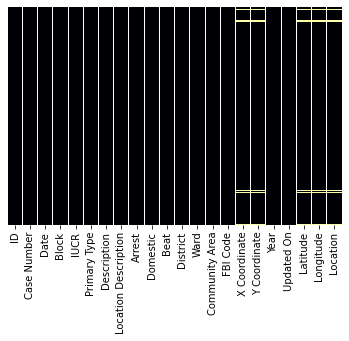

In [5]:
sns.heatmap(data = main_df.isna(), yticklabels=False, cbar=False, cmap='inferno')

In [6]:
main_df = main_df.dropna()
main_df.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [7]:
print("Data Retained after Cleaning:",round(((main_df.shape[0]/orig_shape[0]) * 100),2),"%")

Data Retained after Cleaning: 98.35 %


In [8]:
main_df.head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,10365064,HZ100370,12/31/2015 11:59:00 PM,075XX S EMERALD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,17.0,68.0,14,1172605.0,1854931.0,2015,02/10/2018 03:50:01 PM,41.757367,-87.642993,"(41.757366519, -87.642992854)"
2,10364662,HZ100006,12/31/2015 11:55:00 PM,079XX S STONY ISLAND AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,8.0,45.0,04B,1188223.0,1852840.0,2015,02/10/2018 03:50:01 PM,41.751270,-87.585822,"(41.751270452, -87.585822373)"
3,10364740,HZ100010,12/31/2015 11:50:00 PM,024XX W FARGO AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,50.0,2.0,06,1158878.0,1949369.0,2015,02/10/2018 03:50:01 PM,42.016804,-87.690709,"(42.016804165, -87.690708662)"
4,10364683,HZ100002,12/31/2015 11:50:00 PM,037XX N CLARK ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,44.0,6.0,08B,1167786.0,1925033.0,2015,02/10/2018 03:50:01 PM,41.949837,-87.658635,"(41.949837364, -87.658635101)"
5,10365142,HZ100722,12/31/2015 11:45:00 PM,001XX E WACKER DR,0880,THEFT,PURSE-SNATCHING,SIDEWALK,False,False,...,42.0,32.0,06,1177683.0,1902638.0,2015,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)"
6,10365005,HZ100487,12/31/2015 11:45:00 PM,001XX E WACKER DR,0820,THEFT,$500 AND UNDER,STREET,False,False,...,42.0,32.0,06,1177683.0,1902638.0,2015,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)"
7,10366580,HZ102701,12/31/2015 11:45:00 PM,050XX W CONCORD PL,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,37.0,25.0,14,1142595.0,1910502.0,2015,02/10/2018 03:50:01 PM,41.910470,-87.751597,"(41.910469677, -87.751597381)"
8,10364809,HZ100034,12/31/2015 11:42:00 PM,004XX E RANDOLPH ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,False,True,...,42.0,32.0,26,1179325.0,1901333.0,2015,02/10/2018 03:50:01 PM,41.884547,-87.616947,"(41.884546689, -87.616947314)"
9,10364668,HY556628,12/31/2015 11:41:00 PM,048XX S JUSTINE ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,True,True,...,20.0,61.0,26,1166823.0,1872564.0,2015,02/10/2018 03:50:01 PM,41.805879,-87.663680,"(41.805879049, -87.663679798)"
10,10364943,HZ100396,12/31/2015 11:30:00 PM,003XX W 25TH PL,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,11.0,34.0,14,1174442.0,1887387.0,2015,02/10/2018 03:50:01 PM,41.846388,-87.635295,"(41.846388365, -87.635294564)"


In [9]:
print(main_df.columns)

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


# Cleaning Data

In [12]:
def time_convert(date_time):
    s1 = date_time[:11]
    s2 = date_time[11:]
    
    month = s1[:2]
    print(month)
    date = s1[3:5]
    year = s1[6:10]
    
    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'
    
    final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
    return final_date

In [13]:
main_df['Date'] = main_df['Date'].apply(time_convert)

In [14]:
main_df['Date'].head()

1   2015-12-31 23:59:00
2   2015-12-31 23:55:00
3   2015-12-31 23:50:00
4   2015-12-31 23:50:00
5   2015-12-31 23:45:00
Name: Date, dtype: datetime64[ns]

In [12]:
def month_col(x):
    return int(x.strftime("%m"))
main_df['Month'] = main_df['Date'].apply(month_col)

def day_col(x):
    return int(x.strftime("%w"))
main_df['Day'] = main_df['Date'].apply(day_col)  

def hour_col(x):
    return int(x.strftime("%H"))
main_df['Hour'] = main_df['Date'].apply(hour_col)

In [13]:
main_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
1,10365064,HZ100370,2015-12-31 23:59:00,075XX S EMERALD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,1172605.0,1854931.0,2015,02/10/2018 03:50:01 PM,41.757367,-87.642993,"(41.757366519, -87.642992854)",12,4,23
2,10364662,HZ100006,2015-12-31 23:55:00,079XX S STONY ISLAND AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,1188223.0,1852840.0,2015,02/10/2018 03:50:01 PM,41.751270,-87.585822,"(41.751270452, -87.585822373)",12,4,23
3,10364740,HZ100010,2015-12-31 23:50:00,024XX W FARGO AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,1158878.0,1949369.0,2015,02/10/2018 03:50:01 PM,42.016804,-87.690709,"(42.016804165, -87.690708662)",12,4,23
4,10364683,HZ100002,2015-12-31 23:50:00,037XX N CLARK ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,1167786.0,1925033.0,2015,02/10/2018 03:50:01 PM,41.949837,-87.658635,"(41.949837364, -87.658635101)",12,4,23
5,10365142,HZ100722,2015-12-31 23:45:00,001XX E WACKER DR,0880,THEFT,PURSE-SNATCHING,SIDEWALK,False,False,...,1177683.0,1902638.0,2015,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)",12,4,23


In [14]:
top_10 = list(main_df['Primary Type'].value_counts().head(10).index)
print(top_10)
def filter_top_10(df):
    df2=df[df['Primary Type']=='THEFT']
    for crime in top_10[1:]:
        temp=df[df['Primary Type']==crime]
        df2 = df2.append(temp, ignore_index=True)
    return df2


df2=filter_top_10(main_df) # the dataframe with all the data of only the top 10 crimes
df2.shape

['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'NARCOTICS', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY']


(1404686, 25)

In [15]:
1036588/1146382 * 100

90.42256420634658

In [16]:
df2.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
0,10364740,HZ100010,2015-12-31 23:50:00,024XX W FARGO AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,1158878.0,1949369.0,2015,02/10/2018 03:50:01 PM,42.016804,-87.690709,"(42.016804165, -87.690708662)",12,4,23
1,10365142,HZ100722,2015-12-31 23:45:00,001XX E WACKER DR,0880,THEFT,PURSE-SNATCHING,SIDEWALK,False,False,...,1177683.0,1902638.0,2015,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)",12,4,23
2,10365005,HZ100487,2015-12-31 23:45:00,001XX E WACKER DR,0820,THEFT,$500 AND UNDER,STREET,False,False,...,1177683.0,1902638.0,2015,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)",12,4,23
3,10364834,HZ100276,2015-12-31 23:30:00,015XX S MORGAN ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,1170163.0,1892555.0,2015,01/07/2016 04:14:34 PM,41.860664,-87.650847,"(41.860664155, -87.650847428)",12,4,23
4,10365158,HZ100762,2015-12-31 23:30:00,035XX N SOUTHPORT AVE,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,1166346.0,1923429.0,2015,02/10/2018 03:50:01 PM,41.945467,-87.663974,"(41.945466899, -87.663974392)",12,4,23


In [17]:
df2[['Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'Location', 'X Coordinate', 'Y Coordinate']].head()

,Domestic,Beat,District,Ward,Community Area,FBI Code,Location,X Coordinate,Y Coordinate
0,False,2411,24.0,50.0,2.0,06,"(42.016804165, -87.690708662)",1158878.0,1949369.0
1,False,114,1.0,42.0,32.0,06,"(41.888165132, -87.622937212)",1177683.0,1902638.0
2,False,114,1.0,42.0,32.0,06,"(41.888165132, -87.622937212)",1177683.0,1902638.0
3,False,1232,12.0,25.0,28.0,06,"(41.860664155, -87.650847428)",1170163.0,1892555.0
4,False,1922,19.0,44.0,6.0,06,"(41.945466899, -87.663974392)",1166346.0,1923429.0


In [18]:
cri5 = df2.groupby(['Month','Day','District','Hour'], as_index=False).agg({"Primary Type":"count"})
cri5 = cri5.sort_values(by=['District'], ascending=False)
cri5.head()

,Month,Day,District,Hour,Primary Type
22718,7,0,31.0,9,1
31705,9,3,31.0,10,1
16375,5,2,31.0,9,1
40689,11,6,31.0,12,1
23777,7,2,31.0,9,1


In [19]:
cri6=cri5.rename(index=str, columns={"Primary Type":"Crime_Count"})
cri6.head()

,Month,Day,District,Hour,Crime_Count
22718,7,0,31.0,9,1
31705,9,3,31.0,10,1
16375,5,2,31.0,9,1
40689,11,6,31.0,12,1
23777,7,2,31.0,9,1


# Viewing cleaned data

In [20]:
cri6 = cri6[['Month','Day','District','Hour','Crime_Count']]

print("The shape of our final dataset is:", cri6.shape)
cri6.head()

The shape of our final dataset is: (44387, 5)


,Month,Day,District,Hour,Crime_Count
22718,7,0,31.0,9,1
31705,9,3,31.0,10,1
16375,5,2,31.0,9,1
40689,11,6,31.0,12,1
23777,7,2,31.0,9,1


In [21]:
print("Highest Crime Count at any district at any time point:", cri6["Crime_Count"].max())
print("Lowest Crime Count at any district at any time point:", cri6["Crime_Count"].min())

Highest Crime Count at any district at any time point: 114
Lowest Crime Count at any district at any time point: 1


In [22]:
lower = np.mean(cri6['Crime_Count'])-0.75*np.std(cri6['Crime_Count'])
higher = np.mean(cri6['Crime_Count'])+0.75*np.std(cri6['Crime_Count'])
print(lower, higher)

19.614962293236914 43.67771349021319


Text(0.5, 1.0, 'Crime Count Distribution')

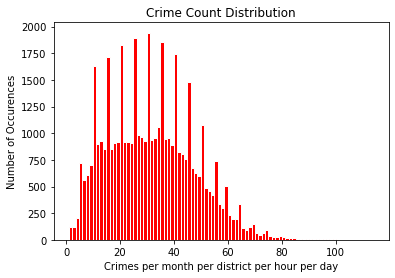

In [31]:
plt.hist(x='Crime_Count', data=cri6,bins=90,linewidth=1,edgecolor='white', color='red')
#plt.title("Distribution of Crimes in Chicago", fontfamily="Agency FB", fontsize=25)
plt.xlabel("Crimes per month per district per hour per day")
plt.ylabel("Number of Occurences")
plt.title("Crime Count Distribution")


In [24]:
# 0-14 : Low Crime Rate
# 15-33 : Medium Crime Rate
# 34 and above : High Crime Rate

### The above ranges can be made better with the help of a crime analyst. As of now, we have used an intuitive way
### of generating classifications for our target feature; based on aproximating the distribution of the crime counts
### as a Normal curve

# Feature Engineer the above dataset
def crime_rate_assign(x):
    if(x<=14):
        return 0
    elif(x>14 and x<=33):
        return 1
    else:
        return 2
cri6['Alarm'] = cri6['Crime_Count'].apply(crime_rate_assign)
cri6 = cri6[['Month','Day','Hour','District','Crime_Count','Alarm']]    
cri6.head()

,Month,Day,Hour,District,Crime_Count,Alarm
22718,7,0,9,31.0,1,0
31705,9,3,10,31.0,1,0
16375,5,2,9,31.0,1,0
40689,11,6,12,31.0,1,0
23777,7,2,9,31.0,1,0


In [32]:
cri6.to_csv("C:\\Users\\Manoj H A\\OneDrive\\Desktop\\crime\\data\\Crime_Compressed.csv")

<AxesSubplot:>

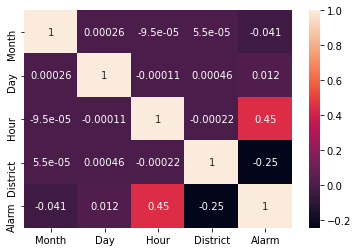

In [36]:
temp = cri6[['Month', 'Day', 'Hour', 'District', 'Alarm']]
sns.heatmap(temp.corr(), annot=True)